In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [6]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [7]:
df.drop(['ADDRESS','BHK_OR_RK'],axis=1,inplace=True)

In [8]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')


In [12]:
import numpy as np

In [13]:
x=np.array(ct.fit_transform(x))

In [14]:
x

array([[0.0, 0.0, 1.0, ..., 1, 12.96991, 77.59796],
       [0.0, 1.0, 0.0, ..., 1, 12.274538, 76.644605],
       [0.0, 0.0, 1.0, ..., 1, 12.778033, 77.632191],
       ...,
       [0.0, 1.0, 0.0, ..., 1, 26.928785, 75.828002],
       [0.0, 0.0, 1.0, ..., 1, 12.90015, 80.22791],
       [0.0, 1.0, 0.0, ..., 1, 26.832353, 75.841749]], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
l=LinearRegression()

In [21]:
l.fit(x_train,y_train)

LinearRegression()

In [22]:
p=l.predict(x_test)

In [23]:
import seaborn as sns

D:\program\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

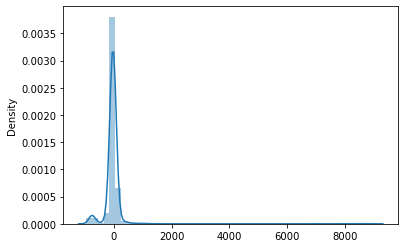

In [24]:
sns.distplot(y_test-p)

D:\program\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

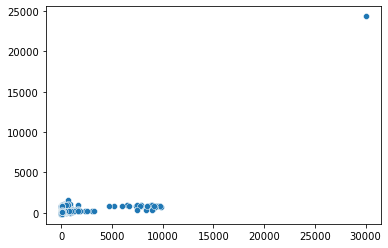

In [25]:
sns.scatterplot(y_test,p)

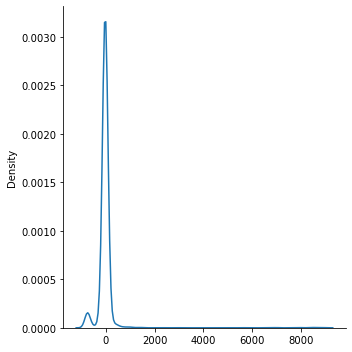

In [26]:
sns.displot(y_test-p,kind='kde')

D:\program\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

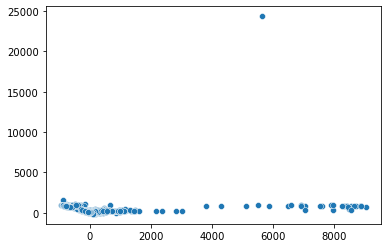

In [28]:
s=y_test-p
sns.scatterplot(s,p)

In [29]:
from sklearn import metrics

In [30]:
print('MAE',metrics.mean_absolute_error(y_test,p))
print('MSE',metrics.mean_squared_error(y_test,p))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE 133.48618224404007
MSE 283449.9278084986
RMSE 532.4001575962376


In [32]:
import pickle
pickle.dump(l,open('model.pkl','wb'))